# Recolectando los datos

Importaciones necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from scipy.stats import pearsonr


Importando datos

In [3]:
df = pd.read_csv('./data/tesis_total_data - Sheet1.csv')
df

,Fecha,precio_eth,volumen_eth,precio_nasdaq,volumen_nasdaq
0,2015-09-08 00:00:00,"1,236033261","419148,8018","4811,930176",1765600000
1,2015-09-09 00:00:00,"1,206529945","367774,3319","4756,529785",1963750000
2,2015-09-10 00:00:00,"1,167234841","639527,9175","4796,25",1845770000
3,2015-09-11 00:00:00,"0,9765090927","1901710,695","4822,339844",1686190000
4,2015-09-14 00:00:00,"0,8740229624","739213,7259","4805,759766",1467740000
...,...,...,...,...,...
1503,2021-08-30 00:00:00,"3233,383152",14110206249,"15265,88965",4061760000
1504,2021-08-31 00:00:00,"3232,733863",21741061739,"15259,24023",4188020000
1505,2021-09-01 00:00:00,"3440,562336",32201644523,"15309,37988",4271690000
1506,2021-09-02 00:00:00,"3790,613996",34465100678,"15331,17969",4050510000


Creando un enuma para las variables en el dataframe

In [4]:
class DFV:
    PRECIO_ETH = 'precio_eth'
    VOLUMEN_ETH = 'volumen_eth'
    PRECIO_NASDAQ = 'precio_nasdaq'
    VOLUMEN_NASDAQ = 'volumen_nasdaq'
    FECHA = "Fecha"



print(type(DFV.PRECIO_ETH))

<class 'str'>


### Analisis descriptivo de cada una de las variables

#### Precio Etherium

In [5]:
df[DFV.PRECIO_ETH].describe()

count            1508
unique           1508
top       1,236033261
freq                1
Name: precio_eth, dtype: object

#### Volumen Etherium

In [6]:
df[DFV.VOLUMEN_ETH].describe()

count            1508
unique           1508
top       419148,8018
freq                1
Name: volumen_eth, dtype: object

#### Precio Nasdaq

In [7]:
df[DFV.PRECIO_NASDAQ].describe()

count            1508
unique           1503
top       7953,879883
freq                2
Name: precio_nasdaq, dtype: object

#### Volumen Nasdaq

In [8]:
df[DFV.VOLUMEN_NASDAQ].describe()

count    1.508000e+03
mean     2.737043e+09
std      1.367530e+09
min      7.068800e+08
25%      1.884398e+09
50%      2.155635e+09
75%      3.436315e+09
max      1.162119e+10
Name: volumen_nasdaq, dtype: float64

### Convirtiando las columnas en valores numericos

In [9]:
# Quitando la coma
df[DFV.PRECIO_ETH] = df[DFV.PRECIO_ETH].str.replace(',','.')
df[DFV.VOLUMEN_ETH] = df[DFV.VOLUMEN_ETH].str.replace(',','.')
df[DFV.PRECIO_NASDAQ] = df[DFV.PRECIO_NASDAQ].str.replace(',','.')
# df['volumen_nasdaq'] = df['volumen_nasdaq'].str.replace(',','.')

# Convirtiendo los valores en numeros
df[DFV.PRECIO_ETH] = pd.to_numeric(df[DFV.PRECIO_ETH])
df[DFV.VOLUMEN_ETH] = pd.to_numeric(df[DFV.VOLUMEN_ETH])
df[DFV.PRECIO_NASDAQ] = pd.to_numeric(df[DFV.PRECIO_NASDAQ])
df[DFV.VOLUMEN_NASDAQ] = pd.to_numeric(df[DFV.VOLUMEN_NASDAQ])

df

,Fecha,precio_eth,volumen_eth,precio_nasdaq,volumen_nasdaq
0,2015-09-08 00:00:00,1.236033,4.191488e+05,4811.930176,1765600000
1,2015-09-09 00:00:00,1.206530,3.677743e+05,4756.529785,1963750000
2,2015-09-10 00:00:00,1.167235,6.395279e+05,4796.250000,1845770000
3,2015-09-11 00:00:00,0.976509,1.901711e+06,4822.339844,1686190000
4,2015-09-14 00:00:00,0.874023,7.392137e+05,4805.759766,1467740000
...,...,...,...,...,...
1503,2021-08-30 00:00:00,3233.383152,1.411021e+10,15265.889650,4061760000
1504,2021-08-31 00:00:00,3232.733863,2.174106e+10,15259.240230,4188020000
1505,2021-09-01 00:00:00,3440.562336,3.220164e+10,15309.379880,4271690000
1506,2021-09-02 00:00:00,3790.613996,3.446510e+10,15331.179690,4050510000


## Graficas Básicas

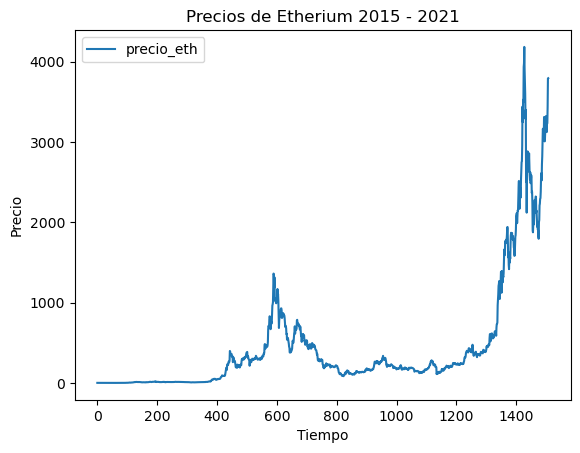

In [10]:
# Grafica Etherium
df.plot(y=DFV.PRECIO_ETH)
plt.title('Precios de Etherium 2015 - 2021')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.show()

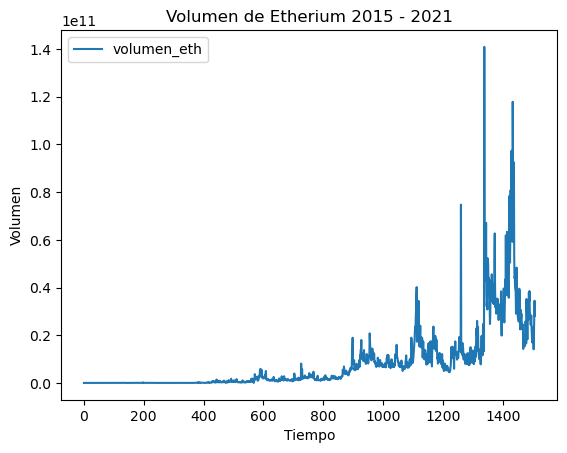

In [11]:
df.plot(y=DFV.VOLUMEN_ETH)
plt.title('Volumen de Etherium 2015 - 2021')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.show()

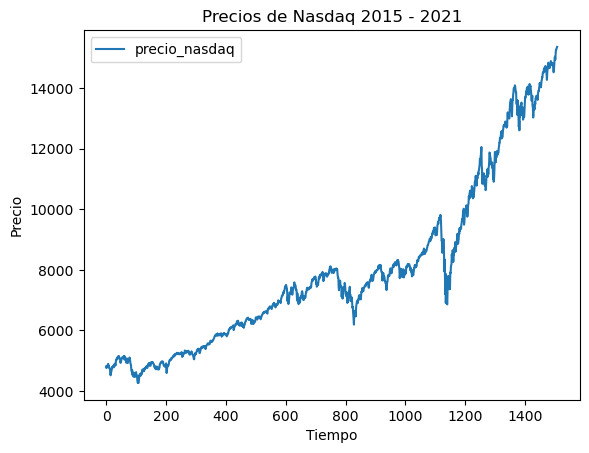

In [12]:
df.plot(y=DFV.PRECIO_NASDAQ)
plt.title('Precios de Nasdaq 2015 - 2021')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.show()

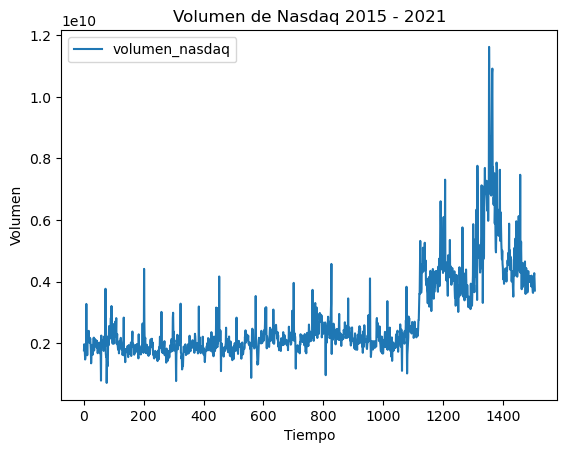

In [13]:
df.plot(y=DFV.VOLUMEN_NASDAQ)
plt.title('Volumen de Nasdaq 2015 - 2021')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.show()

# Correlaciones

## Correlacion de Pearson

In [14]:
corr_matrix = df.corr()
corr_matrix

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_25220\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,precio_eth,volumen_eth,precio_nasdaq,volumen_nasdaq
precio_eth,1.000000,0.745325,0.784610,0.560634
volumen_eth,0.745325,1.000000,0.773288,0.683257
precio_nasdaq,0.784610,0.773288,1.000000,0.779092
volumen_nasdaq,0.560634,0.683257,0.779092,1.000000


## Calcular los valores p de dos lados para la correlación Pairwise

In [15]:
corr, p_value = pearsonr(df[DFV.PRECIO_ETH], df[DFV.VOLUMEN_ETH])
corr


0.745324976958349

In [16]:
# correlation = df.corr(method='holm')

# Regresion Lineal

## Precio Nadaq Respecto a precio Etherium

In [17]:
model_h = smf.ols(f'{DFV.PRECIO_NASDAQ} ~ {DFV.PRECIO_ETH}', df)
result_h = model_h.fit()
result_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          precio_nasdaq   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2412.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          5.61e-315
Time:                        14:11:18   Log-Likelihood:                -13391.
No. Observations:                1508   AIC:                         2.679e+04
Df Residuals:                    1506   BIC:                         2.680e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6580.3242     53.022    124.105      0.000    6476.319    6684.330
precio_eth     3.0698      0.063     49.111      0.000       2.947       3.192
==============================================================================
Omnibus:                       69.503   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.326
Skew:                           0.544   Prob(JB):                     1.62e-17
Kurtosis:                       2.788   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

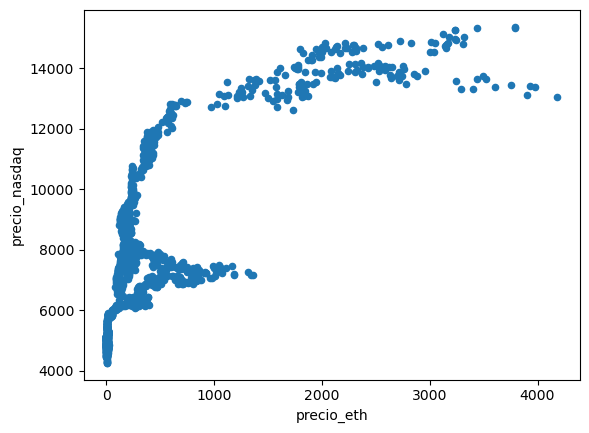

In [18]:
# Graficando
df.plot.scatter(x=DFV.PRECIO_ETH, y=DFV.PRECIO_NASDAQ)
plt.show()

## Regresion lineal multiple

### Precio de Nasdaq Respecto a Precio de Etherium + Volumen de Etherium

In [19]:
model_Reg2 = smf.ols('precio_nasdaq ~ precio_eth + volumen_eth', df)
result_Reg2 = model_Reg2.fit()
result_Reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          precio_nasdaq   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1719.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:11:18   Log-Likelihood:                -13215.
No. Observations:                1508   AIC:                         2.644e+04
Df Residuals:                    1505   BIC:                         2.645e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6431.4964     47.794    134.568      0.000    6337.747    6525.246
precio_eth      1.8331      0.083     21.963      0.000       1.669       1.997
volumen_eth  8.721e-08   4.39e-09     19.879      0.000    7.86e-08    9.58e-08
==============================================================================
Omnibus:                      100.044   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              454.147
Skew:                          -0.006   Prob(JB):                     2.42e-99
Kurtosis:                       5.688   Cond. No.                     1.90e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

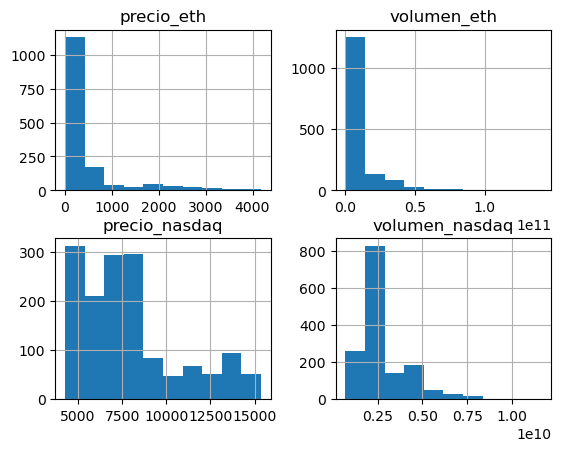

In [20]:
df.hist()
plt.show()

In [21]:
# Graficando
# df.plot.scatter(x=["precio_eth", "volumen_eth"], y="precio_nasdaq")
# plt.show()

### Precio de Nasdaq Respecto a Precio de Etherium + Volumen de Etherium + Volumen de Nasdaq

In [22]:
model_Reg3 = smf.ols('precio_nasdaq ~ precio_eth + volumen_eth + volumen_nasdaq', df)
result_Reg3 = model_Reg3.fit()
result_Reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          precio_nasdaq   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1921.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:11:19   Log-Likelihood:                -12925.
No. Observations:                1508   AIC:                         2.586e+04
Df Residuals:                    1504   BIC:                         2.588e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4534.4626     81.468     55.659      0.000    4374.659    4694.266
precio_eth         1.6387      0.069     23.669      0.000       1.503       1.774
volumen_eth     3.442e-08   4.13e-09      8.340      0.000    2.63e-08    4.25e-08
volumen_nasdaq  8.822e-07   3.32e-08     26.608      0.000    8.17e-07    9.47e-07
==============================================================================
Omnibus:                        7.994   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.299
Skew:                           0.039   Prob(JB):                      0.00580
Kurtosis:                       3.397   Cond. No.                     3.97e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Criterio de Información de Akaike (AIC): model_Reg3

In [23]:
aic = result_Reg3.aic
aic

25857.129763015902

### Intervalos de confianza: model_Reg3

In [24]:
# 95% de intervalo de confianza
conf_int = result_Reg3.conf_int(alpha=0.05)
conf_int

,0,1
Intercept,4.374659e+03,4.694266e+03
precio_eth,1.502868e+00,1.774477e+00
volumen_eth,2.632438e-08,4.251402e-08
volumen_nasdaq,8.171557e-07,9.472239e-07


### Anova: model_Reg3

In [25]:
from statsmodels.stats.anova import anova_lm

In [26]:
anova_results_Reg3 = anova_lm(result_Reg3)
anova_results_Reg3

,df,sum_sq,mean_sq,F,PR(>F)
precio_eth,1.0,7.305415e+09,7.305415e+09,4472.800404,0.000000e+00
volumen_eth,1.0,9.486161e+08,9.486161e+08,580.798003,8.795853e-109
volumen_nasdaq,1.0,1.156387e+09,1.156387e+09,708.007144,3.723178e-128
Residual,1504.0,2.456480e+09,1.633298e+06,NaN,NaN


### Anova: model_Reg2

In [27]:
anova_results_Reg2 = anova_lm(result_Reg2)
anova_results_Reg2

,df,sum_sq,mean_sq,F,PR(>F)
precio_eth,1.0,7.305415e+09,7.305415e+09,3043.192978,0.000000e+00
volumen_eth,1.0,9.486161e+08,9.486161e+08,395.161922,2.879375e-78
Residual,1505.0,3.612866e+09,2.400576e+06,NaN,NaN


# Modelo de GARCH

## Intalando dependencias

In [28]:
%pip install arch

In [29]:
import arch

## Copiando el dataframe

In [30]:
df_garch = df.copy()
df_garch

,Fecha,precio_eth,volumen_eth,precio_nasdaq,volumen_nasdaq
0,2015-09-08 00:00:00,1.236033,4.191488e+05,4811.930176,1765600000
1,2015-09-09 00:00:00,1.206530,3.677743e+05,4756.529785,1963750000
2,2015-09-10 00:00:00,1.167235,6.395279e+05,4796.250000,1845770000
3,2015-09-11 00:00:00,0.976509,1.901711e+06,4822.339844,1686190000
4,2015-09-14 00:00:00,0.874023,7.392137e+05,4805.759766,1467740000
...,...,...,...,...,...
1503,2021-08-30 00:00:00,3233.383152,1.411021e+10,15265.889650,4061760000
1504,2021-08-31 00:00:00,3232.733863,2.174106e+10,15259.240230,4188020000
1505,2021-09-01 00:00:00,3440.562336,3.220164e+10,15309.379880,4271690000
1506,2021-09-02 00:00:00,3790.613996,3.446510e+10,15331.179690,4050510000


## Calcular los rendimientos logarítmicos de Ethereum y Nasdaq

In [31]:
df_garch["precio_eth"] = np.log(df_garch["precio_eth"]).diff()
df_garch["precio_nasdaq"] = np.log(df_garch["precio_nasdaq"]).diff()
df_garch

,Fecha,precio_eth,volumen_eth,precio_nasdaq,volumen_nasdaq
0,2015-09-08 00:00:00,NaN,4.191488e+05,NaN,1765600000
1,2015-09-09 00:00:00,-0.024159,3.677743e+05,-0.011580,1963750000
2,2015-09-10 00:00:00,-0.033111,6.395279e+05,0.008316,1845770000
3,2015-09-11 00:00:00,-0.178409,1.901711e+06,0.005425,1686190000
4,2015-09-14 00:00:00,-0.110877,7.392137e+05,-0.003444,1467740000
...,...,...,...,...,...
1503,2021-08-30 00:00:00,0.034744,1.411021e+10,0.008974,4061760000
1504,2021-08-31 00:00:00,-0.000201,2.174106e+10,-0.000436,4188020000
1505,2021-09-01 00:00:00,0.062307,3.220164e+10,0.003280,4271690000
1506,2021-09-02 00:00:00,0.096893,3.446510e+10,0.001423,4050510000


## Eliminando valores faltantes

In [32]:
df_garch.dropna(inplace=True)
df_garch

,Fecha,precio_eth,volumen_eth,precio_nasdaq,volumen_nasdaq
1,2015-09-09 00:00:00,-0.024159,3.677743e+05,-0.011580,1963750000
2,2015-09-10 00:00:00,-0.033111,6.395279e+05,0.008316,1845770000
3,2015-09-11 00:00:00,-0.178409,1.901711e+06,0.005425,1686190000
4,2015-09-14 00:00:00,-0.110877,7.392137e+05,-0.003444,1467740000
5,2015-09-15 00:00:00,0.074711,7.258165e+05,0.011330,1587460000
...,...,...,...,...,...
1503,2021-08-30 00:00:00,0.034744,1.411021e+10,0.008974,4061760000
1504,2021-08-31 00:00:00,-0.000201,2.174106e+10,-0.000436,4188020000
1505,2021-09-01 00:00:00,0.062307,3.220164e+10,0.003280,4271690000
1506,2021-09-02 00:00:00,0.096893,3.446510e+10,0.001423,4050510000


## Regresiones Logarítmicas

In [35]:
df_log = pd.read_csv('./data/tesis_total_data_log.csv')
df_log

,Fecha,precio_eth,precio_eth_log,volumen_eth,volumen_eth_log,precio_nasdaq,precio_nasdaq_log,volumen_nasdaq,volumen_nasdaq_log
0,2015-09-08 0:00:00,"1,236","0,212","419.148,80","12,95","4.811,93","8,48","1.765.600.000,00","21,29175641"
1,2015-09-09 0:00:00,"1,207","0,188","367.774,33","12,82","4.756,53","8,47","1.963.750.000,00","21,39812175"
2,2015-09-10 0:00:00,"1,167","0,155","639.527,92","13,37","4.796,25","8,48","1.845.770.000,00","21,33616237"
3,2015-09-11 0:00:00,"0,977","-0,024","1.901.710,70","14,46","4.822,34","8,48","1.686.190.000,00","21,24573738"
4,2015-09-14 0:00:00,"0,874","-0,135","739.213,73","13,51","4.805,76","8,48","1.467.740.000,00","21,10698964"
...,...,...,...,...,...,...,...,...,...
1503,2021-08-30 0:00:00,"3.233,383","8,081","14.110.206.249,00","23,37","15.265,89","9,63","4.061.760.000,00","22,12488221"
1504,2021-08-31 0:00:00,"3.232,734","8,081","21.741.061.739,00","23,80","15.259,24","9,63","4.188.020.000,00","22,15549391"
1505,2021-09-01 0:00:00,"3.440,562","8,143","32.201.644.523,00","24,20","15.309,38","9,64","4.271.690.000,00","22,17527537"
1506,2021-09-02 0:00:00,"3.790,614","8,240","34.465.100.678,00","24,26","15.331,18","9,64","4.050.510.000,00","22,12210864"


In [36]:
class DF_LOG(DFV):
    PE_LOG = "precio_eth_log"
    VE_LOG = "volumen_eth_log"
    PN_LOG = "precio_nasdaq_log"
    VN_LOG = "volumen_nasdaq_log"

### Modelo 1